# Estudo do algoritmo K-means

### Implementação com Python

In [1]:
#Imports
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [4]:
# Importando o dataset
df = pd.read_csv('./dataset_analysis/dataframe.csv')
del df['UF']
del df['NIS_FAVORECIDO']
del df['MES_COMPETENCIA']
del df['Unnamed: 0']
print(df.shape) #retorna uma tupla representando a dimensão do dataframe
df.head()

(203340, 2)


,CODIGO_MUNICIPIO_SIAFI,NIS
0,9701,1.668612
1,9701,1.668612
2,9701,1.668612
3,9701,1.668612
4,9701,2.125903


In [5]:
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.head()


,0,1
0,0.976711,0.490515
1,0.976711,0.490515
2,0.976711,0.490515
3,0.976711,0.490515
4,0.976711,0.826534


In [6]:
# Getting the values and plotting it
f1 = df['CODIGO_MUNICIPIO_SIAFI'].values
f2 = df['NIS'].values
X = np.array(list(zip(f1, f2)))
#print(X)
plt.scatter(f1, f2, c='black', s=10) #s representa a 'espessura' dos pontos

NameError: name 'data' is not defined

In [15]:
# Calculo da distância
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [16]:
# Número de clusters
k = 3
# X coordenadas de centróides aleatórios
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordenadas de centróides aleatórios
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[2226. 3615.]
 [ 892. 9041.]
 [5863. 5630.]]


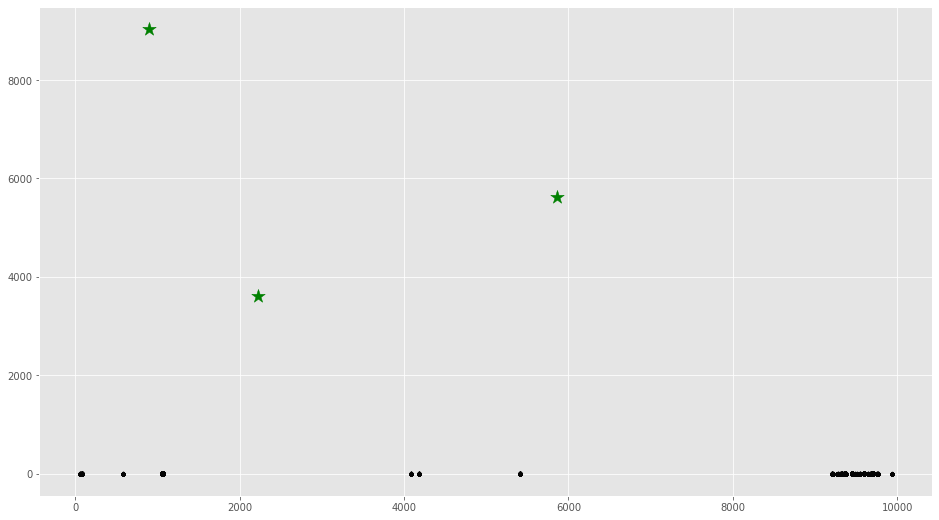

In [17]:
# Traçando junto com os Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [ ]:
# Para armazenar o valor dos centróides quando ele é atualizado
C_old = np.zeros(C.shape)
# Etiquetas de cluster(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

/home/marcos/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/marcos/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


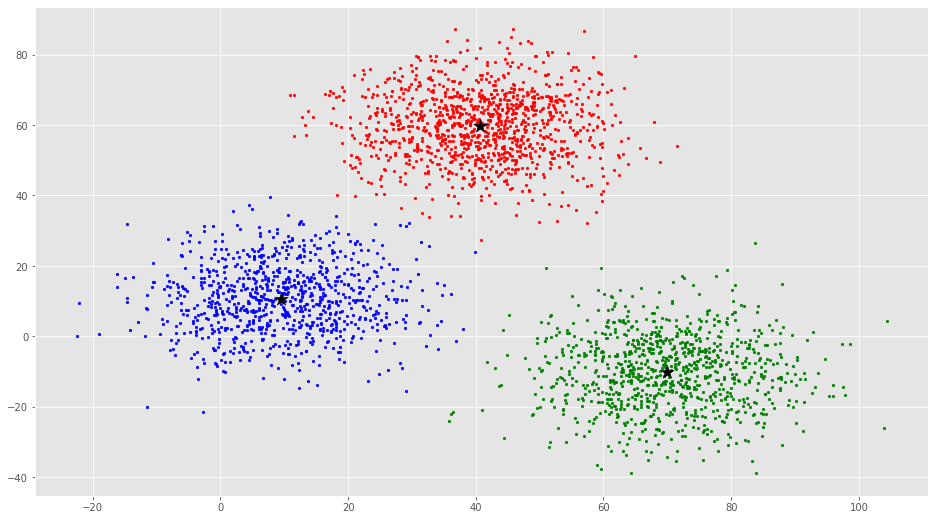

In [9]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')